In [4]:
%matplotlib inline

In [38]:
# this script should turn out to be a working example of an Agent Based Model

# TODO:
#   - agent class
#   - predator/ prey class (derived from agent class)
#   - NN functionality / regular rules for predator/prey
#   - Grid functionality, grass growing rate, etc.



# general stuff
import numpy as np
import matplotlib.pyplot as plt
import uuid
import random as rd
import copy  # needed for deepcopies

Agents = dict()

class Agent:
    """
    This class provides the necessary methods and attributes every agent should
    carry.
    Methods:
        - Move(args): moves the agent around in his neighbourhood
        - FeedOn(args): agent feeds on a given resource - if the resource is a
            prey, it can run away with a given probability. Increases _FoodReserve
            attribute.
        - Die(args): if the _FoodReserve is 0 or an Agent gets eaten it dies and
            is removed.

    Attributes:
        - _FoodReserve: tba
        - _GenCounter: (generation counter) if agents mate and create and offspring,
        this counter increases by 1. Merely a fun paramater as of this writing.
        (if used anyway)
        - _GridPosX/Y: X/Y position on the grid
    """

    # order of arguments in __init__ determines input order of arguments
    def __init__(self, FoodReserve, GridPos, GenCounter=0):
        self._FoodReserve = FoodReserve
        self._GenCounter = GenCounter
        self._GridPosX, self._GridPosY = GridPos
        self._ID = str(uuid.uuid4())
        #Agents[self._ID] = [self._GridPosX, self._GridPosY]
        Agents[self._ID] = self 
        
    def Die(self):
        """
        If an agent dies, it is removed from the list of agents
        """
        del Agents[self._ID]

    def get_fr(self):
        """
        Getter-function for food reserve value
        """
        return self._FoodReserve

    def get_cgp(self):
        """
        Getter-function for current grid position.
        """
        return [self._GridPosX, self._GridPosY]

    def get_ID(self):
        """
        Getter-function for the agents ID.
        """
        return self._ID

    def get_gen(self):
        """
        Getter-function for the generation counter.
        """
        return self._GenCounter 
        
    def get_Nbh(self, gridObject):
        """
        This method returns a list of the moore neighbourhood of the agent. The
        numbering is the following:
            6 7 8
            3 4 5
            0 1 2
        So clearly the Agent is placed in cell nr. 4.
        """
        nbh = []
        delta = [-1, 0, 1]
        x = self._GridPosX  # current X position
        y = self._GridPosY  # current Y position
        wid = gridObject.get_width()  # grid width
        hei = gridObject.get_height()  # grid height
        for dy in delta:
            for dx in delta:
                nbh.append([(x + dx + wid)%wid, (y + dy + hei)%hei])
        return nbh
    #
    #
    # def getNbhIdx(self, gridObject):
    #     """
    #     This method returns a list of the indices of the moore neighbourhood of
    #     the agent. It should hopefully prevent the problems indicaded in the
    #     TODO above.
    #     """
    #     idx = []
    #     # current agents' grid index
    #     iagent = gridObject._grid.index([self._GridPosX, self._GridPosY])
    #     # current agents' row and column
    #     curcol, currow = divmod(iagent, gridObject._width)
    #     for row in [-gridObject._width, 0, gridObject._width]:
    #         for delta in [-1, 0, 1]:
    #             idx.append(iagent + row + delta)
    #     return idx


class Predator(Agent):
    """
    This class is derived from the Agent class.
    """

    def __init__(self, FoodReserve, GridPos, GenCounter):
        super().__init__(FoodReserve, GridPos, GenCounter)
        self._kin = "Pred"

class Prey(Agent):
    """
    This class is derived from the Agent class.
    """
    
    def __init__(self, FoodReserve, GridPos, GenCounter):
        super().__init__(FoodReserve, GridPos, GenCounter)
        self._kin = "Prey"


class Grid:
    """
    hurr durr grid stuff
    """
    def __init__(self, width, height):
        self._width = width
        self._height = height
        self._grid = []
        for y in range(self._height):
            for x in range(self._width):
                self._grid.append([x,y])
                # TODO: maybe each cell carries a list of coordinates, and a list
                # what it contains. e.g. [[x, y], [<Agent/Grass/Nothing>]]
    
    def get_width(self):
        """
        Getter-function for the grid width.  
        """
        return self._width

    def get_height(self):
        """
        Getter-function for the grid height.  
        """
        return self._height

    def get_grid(self):
        """
        Getter-function for the grid positions. 
        """
        return self._grid 

    def initialPositions(self, nAgents):
        """
        This method returns a list of grid positions randomly selected for a given number of Agents. 
        """
        # TODO: Error handling if too many agents are given. 
        shuffledGrid = copy.deepcopy(self._grid)
        rd.shuffle(shuffledGrid)
        return shuffledGrid[:nAgents]

In [89]:
Agents = dict() # initialize empty agent dictionary

w = 10
h = 10
num_agents = 30
food_res = 2

grid = Grid(w,h)
ipos = grid.initialPositions(num_agents)

for _ in range(num_agents):
    Agent(food_res, ipos[_])

IDs = []
_IDs = Agents.keys()

for _ in _IDs:
    IDs.append(_)

testID = IDs[0]

2.0

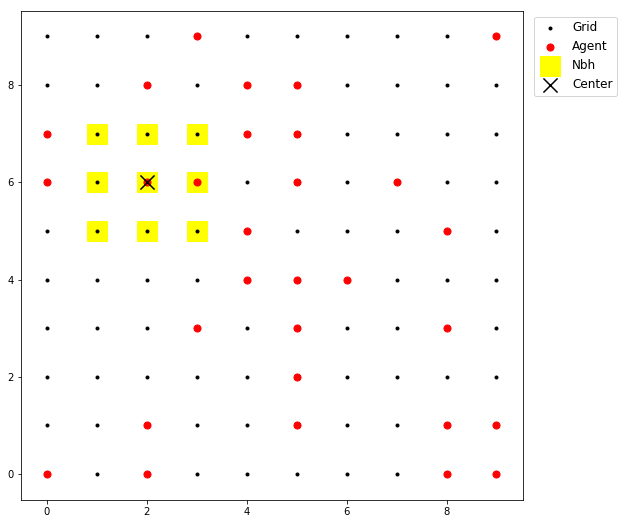

In [91]:
def show_agent_pos(grid, agentpos):
    grid_arr = np.array(grid.get_grid()).T
    agents_arr = np.array(agentpos).T
    
    plt.figure(figsize=(9,9))
    plt.scatter(*grid_arr, marker='.', color='k', label='Grid')
    plt.scatter(*agents_arr, marker='.', s=200, color='r', label='Agent')
    
def show_nbh(grid, agentpos_all, agent_ID):
    show_agent_pos(grid, agentpos_all)

    nbh = np.array(Agents[agent_ID].get_Nbh(grid)).T
    plt.scatter(*nbh, marker='s', color='yellow', s=400, zorder=0, label='Nbh')
    plt.scatter(*nbh.T[4], marker='x', color='k', s=200, zorder=100, label='Center')
    plt.legend(bbox_to_anchor=(1.2, 1.0), fontsize=12)

show_nbh(grid, ipos, testID)

def mean_food(Agents):
    foodres = []
    for agent in Agents.values():
        foodres.append(agent.get_fr())
    return np.mean(foodres)

mean_food(Agents)

In [23]:
plt.scatter?